<a href="https://colab.research.google.com/github/LucasRobles2323/ADA-Informes/blob/main/Informe8-Optimal_BTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Programación Dinámica: Árbol binario de búsqueda óptimo**

**Entrada:** Secuencia ordenada de n claves: $K= \left< k_1,k_2,...,k_n \right>$. Cada clave $k_i$ tiene una probabilidad $p_i$ de ser buscada. Existen **claves ficticias** $d_i$ que representan **búsquedas fallidas** con $k_{i-1} \leq d_i \leq k_i$. Cada clave $d_i$ tiene una probabilidad $q_i$ de ser buscada. La suma de probabilidades debe ser uno, es decir: $\sum\limits_{i=1}^n p_i + \sum\limits_{j=0}^n q_i = 1$

**Salida:**  Construir un **árbol de búsqueda óptimo**, es decir, un árbol que **minimice la cantidad esperada de nodos visitados (costo esperado)**.

##*Descripción del problema*

Se busca construir un **árbol binario de búsqueda óptimo**, es un árbol de búsqueda donde el coste medio de buscar un artículo (el esperado coste de búsqueda) se reduce al mínimo.

Incluso si sólo tenemos estimaciones de los costos de búsqueda, este sistema puede acelerar considerablemente las búsquedas en promedio.


# **2. Árbol binario de búsqueda óptimo**

## **2.1. Descripción del algoritmo**

El costo óptimo para freq[i..j] se puede calcular recursivamente usando la siguiente fórmula. 

$optcost_{(i,j)} = \sum_{k=i}^{j} freq[k] + min_{r=i}^{j}[optcost(i, r-1) + optcost(r+1, j)]$

Necesitamos calcular optCost(0, n-1) para encontrar el resultado. 
La idea de la fórmula anterior es simple, uno por uno probamos todos los nodos como raíz (r varía de i a j en el segundo término). Cuando hacemos que el nodo r sea raíz, calculamos recursivamente el costo óptimo de i a r-1 y de r+1 a j. 
Agregamos la suma de las frecuencias de i a j (ver el primer término en la fórmula anterior).

## **2.2. Código**

###**Útil y necesario para los códigos, se deben ejecutar previamente**

In [168]:
import random
import numpy as np

def OBIG(n): # optimal_bst_instance_generator
    keys = sorted(random.sample(range(1, 100), n))
    arr = np.random.random(n*2+1)
    arr /= arr.sum()
    
    p = list(arr[:n]) # Probabilidad de las claves
    q = arr[n:] # Probabilidad de las claves ficticias
    return keys, p, q
    
keys, p, q = OBIG(10)

print(f"Keys: {keys} {len(keys)}")
print(f"Real: {p} {len(p)}")
print(f"Fict: {q} {len(q)}")

Keys: [5, 10, 20, 21, 37, 41, 57, 66, 73, 96] 10
Real: [0.022843046081724452, 0.0438525718789271, 0.041494203162130615, 0.06855967041924405, 0.08960942002597207, 0.08789760302529925, 0.03396028240492888, 0.07860895798353353, 0.0027742029675238717, 0.09259906317252764] 10
Fict: [0.0278282  0.02310838 0.00532469 0.04644492 0.07202239 0.03775114
 0.10567602 0.00453918 0.04429256 0.00239305 0.06842045] 11


In [169]:
def mostrarMatriz(M, title = "", decimal=True):
  if(len(title) > 1): print(f"{title}:") 
  for i in range(len(M)):
    for j in range(len(M)):
      if (decimal): print("{:.20f}".format(M[i][j]), end=(""))
      else: print("{:.1f}".format(M[i][j]), end=(""))
      if(j < len(M)-1): print(",", end=(" "))
      else: print(" ")

###Recursivo

In [181]:
import random
import numpy as np

llamadasRecursivas = 0

# Funcion recursiva para calcular el costo optimo
def optCostRec(freq, i, j, verbose):
    global llamadasRecursivas 
    if verbose: 
        if llamadasRecursivas > 0: print(f"´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´"+
                                         f"\nLlamada recursiva número {llamadasRecursivas}")
        print("**************************************************************************************************************")
        print(f"El largo es de {j-i+1} datos")

    # Casos base
    if j < i:     # No hay elementos en el sub-arreglo
        return 0
    if j == i:     # Hay un elemento en el sub-arreglo
        return freq[i]
     
    # Obtener sumatoria de frecuencias
    fsum = Sum(freq, i, j)
    if verbose: 
                print("-------------------------------------------------------------------------------------")
                print(f"i = {i}     and     j = {j}")
                print(f"La suma de frecuencias {i}...{j} es {fsum}")
     
    # Inicia el valor minimo
    Min = 999999999999

    # Comprueba todos los elementos como raíz
    # Para encontrar el árbol de búsqueda óptimo
    for r in range(i, j + 1):
        #Recursividad
        if verbose:
                  print("------------------------------------------")
                  print(f"Probemos con {r} de raíz")
        llamadasRecursivas+=1
        optCostLeft = optCostRec(freq, i, r - 1, verbose)
        llamadasRecursivas+=1
        optCostRight = optCostRec(freq, r + 1, j, verbose)

        
        cost = optCostLeft + optCostRight
        if verbose:
                  print(f"Tenemos como costo optimo para el arbol de {i}...{j} datos")
                  print(f"{cost} seria el costo con {r} de raíz")
                  print(f"El costo optimo para el arbol {i}...{j} hasta ahora es {Min}")
        if cost < Min:
            Min = cost
            if verbose:
                print("----------")
                print(f"Como conseguimos un costo mas optimo al guardad, lo reemplazamos")
                print(f"Ahora el costo optimo para arbol {i}...{j} datos sera {cost}")
                print("----------")
    
    # Retorna el minimo valor
    if verbose: 
        if llamadasRecursivas > 0: print(f"Llamada recursiva número {llamadasRecursivas} FIN"+
                                         f"\n´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´")
        else: print("**************************************************************************************************************")
    return Min + fsum
 
# La función principal que calcula el costo mínimo de un árbol de búsqueda binaria. 
# Utiliza principalmente optCost() para encontrar el costo óptimo.
def optimalSearchTreeRecursivo(keys, freq, n, verbose = False, visualize = False):    
    # Se asume que keys esta ordenado.
    return optCostRec(freq, 0, n-1, verbose)
    # Aqui planeaba mostrar el arbol
 

def Sum(freq, i, j):
    s = 0
    for k in range(i, j + 1):
        s += freq[k]
    return s

print(f"Keys: {keys}")
print(f"Real: {p}")
print(f"Fict: {q}")

opt = optimalSearchTreeRecursivo(keys, p, len(keys))
print(f"\nEl costo óptimo de realizar una búsqueda sería de {opt} nodos visitados."+
      f"\nSe realizaron {llamadasRecursivas} llamadas recursivas"+
      f"\nEl árbol tendra {len(keys)} nodos")

Keys: [5, 10, 20, 21, 37, 41, 57, 66, 73, 96]
Real: [0.022843046081724452, 0.0438525718789271, 0.041494203162130615, 0.06855967041924405, 0.08960942002597207, 0.08789760302529925, 0.03396028240492888, 0.07860895798353353, 0.0027742029675238717, 0.09259906317252764]
Fict: [0.0278282  0.02310838 0.00532469 0.04644492 0.07202239 0.03775114
 0.10567602 0.00453918 0.04429256 0.00239305 0.06842045]

El costo óptimo de realizar una búsqueda sería de 1.4307446811234374 nodos visitados.
Se realizaron 32804 llamadas recursivas
El árbol tendra 10 nodos


###Botton-up

In [201]:
import networkx as nx
import matplotlib.pyplot as plt

cantSubProblem = 0

def optCostBottomUp(keys, freq, n, verbose = False):
    max = 9999999999

    # Cree una matriz auxiliar para almacenar
    # los resultados de los sub-problemas
    cost = [[0 for x in range(n)]
               for y in range(n)]
    # cost[i][j] = Costo óptimo del árbol de búsqueda binaria que se puede formar desde keys[i] hasta keys[j]. 
    # cost[0][n-1] = Almacenará el costo resultante.

    # Cree una matriz auxiliar para almacenar
    # los resultados de los sub-problemas
    root = [[0 for x in range(n)]
               for y in range(n)]

    global cantSubProblem
    cantSubProblem += (n*n)
    cantSubProblem -= 1
 
    # Para una sola clave, el costo es igual a la frecuencia de la clave.
    for i in range(n):
        cost[i][i] = freq[i]
 
    # Ahora necesitamos considerar cadenas de longitud 1, 2, ... . 
    # L es la longitud de la cadena.
    for L in range(1, n + 1):
        # i es el número de fila en el costo
        if verbose: 
            print("**************************************************************************************************************")
            print(f"El largo es de {L} datos")
        for i in range(n - L + 1):
            # Obtenga el número de columna j del número de fila i 
            # y la longitud de la cadena L
            j = i + L - 1
            if i >= n or j >= n:
                break
            
            sumaDeFreq = sum(freq, i, j)
            cost[i][j] = max
            if verbose: 
                print("-------------------------------------------------------------------------------------")
                print(f"i = {i}     and     j = {j}")
                print(f"La suma de frecuencias {i}...{j} es {sumaDeFreq}")

            # Intente hacer todas las claves en claves 
            # de intervalo [i..j] como root
            for r in range(i, j + 1):
                if verbose:
                  print("------------------------------------------")
                  print(f"Probemos con {r} de raíz")
                # c = costo cuando las claves [r] se 
                # convierten en raíz de este subárbol
                c = 0
                if (r > i):
                    c += cost[i][r - 1]
                if (r < j):
                    c += cost[r + 1][j]
                c += sumaDeFreq
                if verbose:
                  print(f"Tenemos como costo optimo para el arbol de {i}...{j} datos")
                  print(f"{c} seria el costo con {r} de raíz")
                  print(f"El costo optimo para el arbol {i}...{j} hasta ahora es {cost[i][j]}")
                if (c < cost[i][j]):
                    if verbose:
                        print("----------")
                        print(f"Como conseguimos un costo mas optimo al guardad, lo reemplazamos")
                        print(f"Ahora el costo optimo para arbol {i}...{j} datos sera {c}")
                        print("----------")
                    cost[i][j] = c
                    root[i][j] = r+1
    if verbose: 
      print("**************************************************************************************************************")
    return cost[0][n - 1], root

def addSons(r, k, A,pos, node):
    Ka = k[:pos]
    i = 0
    j = len(Ka)-1
    nPos = r[i][j]
    n = k[nPos-1]
    A.add_nodes_from([(node, {"label": n})])
    node += 1
    Kb = k[pos:]
    i = pos
    j = i + len(Kb)-1
    nPos = r[i][j]
    n = k[nPos-1]
    A.add_nodes_from([(node, {"label": n})])
    node += 1
    return node

def crearArbol(r, k, A):
    nPos = r[0][len(k)-1]
    n = k[nPos-1]
    A.add_nodes_from([(1, {"label": n})])
    node = addSons(r, k, A,nPos-1, 2)

def mostrarArbol(T):
    print("El árbol es")
    
    # La lista color_map alamacena los colores de cada nodo
    color_map = []
    for node in T:
      color_map.append("gray")

    # Los label
    labels={}
    for n in T:
        if "label" in T.nodes[n]: labels[n]=T.nodes[n]["label"]

    # spring_layout: define posiciones para los nodos del grafo
    pos=nx.spring_layout(T)
    
    # para mostrar los nodos en sus posiciones y colores, tamaños, etc.
    nx.draw(T,pos, node_color=color_map, with_labels=False, node_size=800, font_size=14, width  =2.0, edge_color ="black")
    nodes=nx.draw_networkx_labels(T,pos, labels=labels,font_color="white", font_size=12)
 
def optimalSearchTreeBottomUp(keys, freq, n, verbose = False, visualize = False):
    optimal, root = optCostBottomUp(keys, freq, n, verbose)
    # Aqui planeaba mostrar el arbol
    # Pero no supe como
    if visualize: 
        mostrarMatriz(root,"Raíz",False)
        tree = nx.DiGraph()
        crearArbol(root, keys, tree)
        mostrarArbol(tree)
    return optimal

# Obtiene la sumatoria de los valores de i<=freq<=j.
def sum(freq, i, j):
  s = 0
  for k in range(i, j + 1):
    s += freq[k]
  return s

print(f"Keys: {keys}")
print(f"Real: {p}")
print(f"Fict: {q}")

opt = optimalSearchTreeBottomUp(keys, p, len(keys))
print(f"\nEl costo óptimo esperado de realizar una búsqueda sería de {opt} nodos visitados."+
      f"\nSe resolveran {cantSubProblem} sub-problemas."+
      f"\nEl árbol tendra {len(keys)} nodos")

Keys: [5, 10, 20, 21, 37, 41, 57, 66, 73, 96]
Real: [0.022843046081724452, 0.0438525718789271, 0.041494203162130615, 0.06855967041924405, 0.08960942002597207, 0.08789760302529925, 0.03396028240492888, 0.07860895798353353, 0.0027742029675238717, 0.09259906317252764]
Fict: [0.0278282  0.02310838 0.00532469 0.04644492 0.07202239 0.03775114
 0.10567602 0.00453918 0.04429256 0.00239305 0.06842045]

El costo óptimo esperado de realizar una búsqueda sería de 1.4307446811234374 nodos visitados.
Se resolveran 99 sub-problemas.
El árbol tendra 10 nodos


## **2.3. Ejecución del algoritmo paso a paso**

In [178]:
import random
# Crea las instancias, y use la misma en ambos, podra observar la diferencia en sus procesos
n = random.randint(2,5)
print(f"El arbol tendra {n} nodos")
k, pi, qi = OBIG(n)
print(f"Keys: {k}")
print(f"Real: {pi}")
print(f"Fict: {qi}")

El arbol tendra 4 nodos
Keys: [1, 25, 81, 96]
Real: [0.15471145922221968, 0.11219523405798364, 0.13018645021059638, 0.01848516662240927]
Fict: [0.15156281 0.1014203  0.20358201 0.10123795 0.02661861]


###**`verbose=True`**

####Recursivo

In [183]:
llamadasRecursivas = 0
opt = optimalSearchTreeRecursivo(k, pi, len(k), True)
print(f"\nEl costo óptimo de realizar una búsqueda sería de {opt} nodos visitados."+
      f"\nSe realizaron {llamadasRecursivas} llamadas recursivas"+
      f"\nEl árbol tendra {len(k)} nodos")

**************************************************************************************************************
El largo es de 4 datos
-------------------------------------------------------------------------------------
i = 0     and     j = 3
La suma de frecuencias 0...3 es 0.415578310113209
------------------------------------------
Probemos con 0 de raíz
´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´
Llamada recursiva número 1
**************************************************************************************************************
El largo es de 0 datos
´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´´
Llamada recursiva número 2
**************************************************************************************************************
El largo es de 3 datos
-------------------------------------------------------------------------------------
i = 1     and     

####Botton-up

In [184]:
cantSubProblem = 0

opt = optimalSearchTreeBottomUp(k, pi, len(k), True)
print(f"\nEl costo óptimo esperado de realizar una búsqueda sería de {opt} nodos visitados."+
      f"\nSe resolveran {cantSubProblem} sub-problemas."+
      f"\nEl árbol tendra {len(k)} nodos")

**************************************************************************************************************
El largo es de 1 datos
-------------------------------------------------------------------------------------
i = 0     and     j = 0
La suma de frecuencias 0...0 es 0.15471145922221968
------------------------------------------
Probemos con 0 de raíz
Tenemos como costo optimo para el arbol de 0...0 datos
0.15471145922221968 seria el costo con 0 de raíz
El costo optimo para el arbol 0...0 hasta ahora es 9999999999
----------
Como conseguimos un costo mas optimo al guardad, lo reemplazamos
Ahora el costo optimo para arbol 0...0 datos sera 0.15471145922221968
----------
-------------------------------------------------------------------------------------
i = 1     and     j = 1
La suma de frecuencias 1...1 es 0.11219523405798364
------------------------------------------
Probemos con 1 de raíz
Tenemos como costo optimo para el arbol de 1...1 datos
0.11219523405798364 seria el cos

###**`visualize=True`**

####Botton-up

Raíz:
1.0, 1.0, 2.0, 2.0 
0.0, 2.0, 3.0, 3.0 
0.0, 0.0, 3.0, 3.0 
0.0, 0.0, 0.0, 4.0 
El árbol es

El costo óptimo esperado de realizar una búsqueda sería de 0.7374465527908436 nodos visitados.
Se resolveran 15 sub-problemas.
El árbol tendra 4 nodos


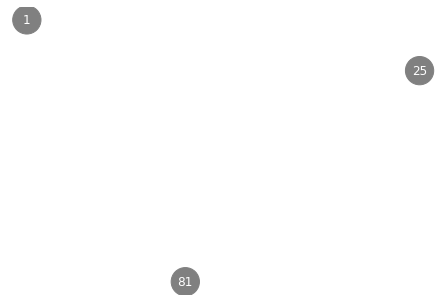

In [202]:
cantSubProblem = 0
opt = optimalSearchTreeBottomUp(k, pi, len(k), False, True)
print(f"\nEl costo óptimo esperado de realizar una búsqueda sería de {opt} nodos visitados."+
      f"\nSe resolveran {cantSubProblem} sub-problemas."+
      f"\nEl árbol tendra {len(k)} nodos")

# **3. Correctitud**

## **Bottom-up**

### **Teorema (Correctitud).**

El algoritmo entrega el costo optimo, es decir, cantidad de nodos esperados a visitar al realizar una búsqueda en un árbol de búsqueda binario de $n$ nodos.

#### **Prueba del Teorema**

Probaremos la siguiente **propiedad invariante de bucle** para el algoritmo `Optimal Binary Search Tree`:

> Al comienzo de cada iteración $i$ del bucle más grande, tendremos el costo óptimo de nodos a visitar del *árbol* con $i=i-1...0$ *nodos* calculado y guardado.

Esto es debido a que para obtener el costo optimo del *árbol de busqueda binara* prueba cada dato como nodo raiz evaluando el costo de dicho nodo como raiz mas el costo de cada posible sub-árbol que se puede formar. 

##### **Inicialización**

Al comienzo de la primera iteración $i=1$, tendremos el costo óptimo del *árbol* con $i-1=0$ *nodos* lo cual es cierto, pues independientemente del término buscado, si el *árbol* tiene $0$ *nodos*. Entonces el costo optimo del *árbol* con $1$ *nodo* será el nodo que tenga menor frecuencia actuando como raíz en un *árbol* de $1$ *nodo*. Y se usara para $i>1$.

##### **Mantención**

Aplicando inducción, asumimos que al comienzo de cada iteración  se cumple la propiedad. Es decir, en la iteración $i$ tenemos el *costo óptimo* para los problemas $i=i-1...0$ calculado.

Consideremos que $i=x$ como el tamaño del problema con $x < n$.

En el bucle de en medio se obtiene el costo del dato $x$ y todos los datos que son menores llamándolo *sumaDeFreq* y el valor de $j$-

Dentro del bucle más pequeño, se calcula *costo óptimo* al usar de *raíz* $b$ de tal manera que $b=x...j$ usando los *costos óptimos* de datos previos a $x$ + la *sumaDeFreq*. Luego se comprueba si este resultado es un *costo óptimo* mayor al *costo optimo* más pequeño encontrado. Esto ocurre para cada valor de *raíz* posible de tomar.

A medida que la cantidad de datos que tendrá el *árbol* aumenta, el *costo óptimo* cambia.

Al finalizar la iteración $i=x$ (y al comienzo de la siguiente $i=x+1$), se seguirá cumpliendo la **propiedad invariante**.


#####**Correctitud**

Finalmente, como la **propiedad de bucle invariante** es verdadera al inicio del bucle y se mantiene en cada iteración, podemos decir que al finalizar la $n$-ésima iteración del algoritmo, se obtendrá el costo óptimo de una búsqueda en un *árbol binario* con $n$ *nodos*.

# **4. Tiempo de ejecución**

##**Bottom-up**

###*Teorema (Complejidad Temporal).*

*El algoritmo `Optimal Binary Search Tree` implementado a traves de **Bottom-up** tiene un **tiempo de ejecución** de $O(n^3)$.*

####*Prueba del teorema.*

#####Lógica

Para la resolución de este problema tenemos 3 bucles, el bucle grande es para recorrer el tamaño de la cadena que conformara los nodos del *árbol*. El bucle mediano maneja la obtención de algunos datos, además de comprobar que se puede seguir. Y finalmente el bucle más interno, se encarga de todos los sub-problemas a resolver antes de ser capaz de resolver el problema real (refiriéndose a probar combinaciones usando cada dato como *raíz* y evaluando el costo de las operaciones para los árboles de menor tamaño).

Cada problema tiene en cuenta que tenemos el *costo óptimo* de sus sub-problemas (el problema para árboles más pequeños y del mismo tamaño con *raíz* distinta). Y con ese dato, dentro del bucle chico se resuelve el problema en un tiempo de ejecución $n-1 \rightarrow O(n)$. 

Para el *costo óptimo* del *árbol* con $n$ *nodos* se deben resolver $\frac{n^2}{2} -1$ subproblemas antes de resolver el problema real.

El problema real también tiene un tiempo de ejecución $n-1 \rightarrow O(n)$.

Entonces se trata de resolver $n^2$ veces un problema con tiempo de ejecución $O(n)$. Por eso el algoritmo **bottom-up** para resolver `Optimal Binary Search Tree` es de $n * (\frac{n^2}{2}-1) → O(n^3)$.

#####Problema matemático

Podemos ver el tiempo de ejecución de todos los subproblemas como sumatoria, debemos resolver todos los subproblemas de tamaño $j=1...n$ por cada valor tomado de raíz siendo $n$ raíces posibles, el total de tiempo de ejecución de los subproblemas seria la suma de todos los subproblemas.

Cada subproblema tiene tiempo de ejecución $T_{sub}(n) = n$.

$\frac{1}{2} * \displaystyle \sum_{j=0}^{n-1}T_{sub}(j)^2 = \frac{(n-1)(n-2)(2(n-1)+1)}{12} = = \frac{(n^2 - 3n + 2)(2n-1)}{12} = \frac{2n^3 - 6n^2 + 4n - n^2 + 3n -2}{12} = \frac{2n^3 - 7n^2 + 7n -2}{12} → O(n^3)$.

Y el tiempo de ejecución del problema sería el de los subproblemas más $n$ (siendo $n$ el tiempo del problema con los subproblemas resueltos).

Quedando lo siguiente como complejidad del algoritmo:

$\frac{2n^3 - 7n^2 + 7n -2}{12} + n = \frac{2n^3 - 7n^2 + 7n + 12n -2}{12} = \frac{2n^3 - 7n^2 + 19n -2}{12} → O(n^3)$

###*Teorema (Complejidad Espacial)*.

*El algoritmo `Optimal Binary Search Tree` implementado a través de **Bottom-up** tiene una complejidad espacial de $O(n^2)$.*

####*Prueba del teorema.*

Para la resolución de este problema, además de los datos necesario que deben ser proporcionados, se debe crear una matriz de *costos* $cost$ de $n$ x $n$ dimensiones, donde se irán guardando los *costos óptimos* de cada subproblema}.

Por ejemplo, en el cuando tengamos el tamaño $x=4$, guardaremos su *costo óptimo* en $cost_4$ para su posterior uso cuando tengamos $x=x+1$.

Por eso la memoria extra que requiere el problema es de $n^2 \rightarrow O(n^2)$.

Ahora si queremos crear el *árbol* que tiene *costo óptimo* necesitaremos además una matriz de *raíz* $root$ de $n$ x $n$ dimensiones.


Por eso, para poder crear el *árbol* de *costo óptimo* la memoria extra que requiere el problema es de $n^2 + n^2 = 2n^2 \rightarrow O(n^2)$.


# **5. Experimentos**

## **5.1. Árbol binario de búsqueda óptimo: Recursivo vs Bottom-up** (Tiempo de ejecución)

### **Comparación de Gráficas** (Tiempo de ejecución)

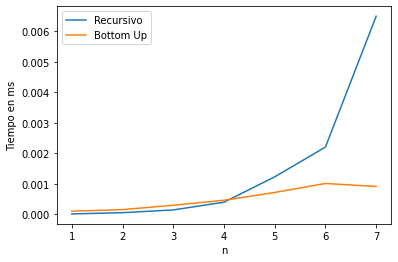

In [120]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

x=[]; y=[]; y1=[]

for n in range(1,8):
    keys, p, q = OBIG(n)
    cantSubProblem = 0
    llamadasRecursivas = 0

    #la función repeat está ejecutando 5 veces optimalSearchTreeBottomUp y optimalSearchTreeRecursivo con el arreglo a y retorna el mejor tiepo obtenido.
    t1 = repeat(setup="from __main__ import optimalSearchTreeBottomUp", stmt=f"optimalSearchTreeBottomUp({keys}, {p}, {len(keys)})", repeat=1, number=10)
    t = repeat(setup="from __main__ import optimalSearchTreeRecursivo", stmt=f"optimalSearchTreeRecursivo({keys}, {p}, {len(keys)})", repeat=1, number=10)

    x.append(n)
    y.append(t)
    y1.append(t1)


plt.plot(x,y)
plt.plot(x,y1)
plt.legend(["Recursivo", "Bottom Up"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

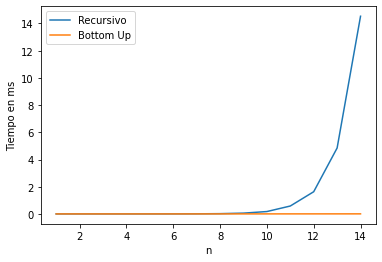

In [121]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

x=[]; y=[]; y1=[]

for n in range(1,15):
    keys, p, q = OBIG(n)
    cantSubProblem = 0
    llamadasRecursivas = 0

    #la función repeat está ejecutando 5 veces optimalSearchTreeBottomUp y optimalSearchTreeRecursivo con el arreglo a y retorna el mejor tiepo obtenido.
    t1 = repeat(setup="from __main__ import optimalSearchTreeBottomUp", stmt=f"optimalSearchTreeBottomUp({keys}, {p}, {len(keys)})", repeat=1, number=10)
    t = repeat(setup="from __main__ import optimalSearchTreeRecursivo", stmt=f"optimalSearchTreeRecursivo({keys}, {p}, {len(keys)})", repeat=1, number=10)

    x.append(n)
    y.append(t)
    y1.append(t1)


plt.plot(x,y)
plt.plot(x,y1)
plt.legend(["Recursivo", "Bottom Up"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

### **Análisis de resultados**

Previamente vimos que **bottom-up** es una solución óptima para este algoritmo, mientras que solucionarlo **recursivamente** no es una estrategia óptima ni eficiente.

Como cabria de esperar, resolver el problema con **bottom-up** es más rápido que usando **recursividad**, y esta diferencia de velocidad se hace mucho mayor a medida que aumenta el tamaño del *árbol* cuyo costo optimo buscamos obtener teniendo la probabilidad de visitar cada *nodo del árbol*. Tanto es asi que basta con ver el tiempo de conseguir el costo óptimo para *árboles* con menos de $100$ de *nodos*, con ver el tiempo de conseguir el costo óptimo para *árboles* con menos de $20$ *nodos*.

Esto puede deberse a la poca eficiencia que presenta la **recursividad** en este problema, pues para la solución de calcular el costo optimo que se puede obtener al usar un *árbol de búsqueda* con $n$ *nodos*, necesitamos el costo optimo que se puede obtener de todos los *árboles de búsqueda* cuya cantidad de nodos sea menor a $n$ y esa información la requerimos varias veces en diferentes tiempos.

La **forma recursiva** de este algoritmo, realiza un mismo subproblema (calcular el costo óptimo de un *árbol de búsqueda* con menos *nodos* a los pedidos) repetidas veces, mientras que el **bottom-up** realiza cada subproblema una vez, partiendo desde el menor, y los guarda para usarlo en las *árboles* de mayor cantidad de *nodos*.
